
# **Task 3: Prediction of House Prices using Linear Regression**

In this task, we build a **Linear Regression model** using Python and `scikit-learn` to predict **house prices** based on simple features like **area (sq. ft.)** and **number of rooms**.  

We will:  
1. Load a dataset  
2. Explore the data  
3. Split it into training and testing sets  
4. Train a Linear Regression model  
5. Evaluate and visualize the results

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Load Dataset
We use the **California Housing dataset** which contains information about houses such as:
- Median income
- Average rooms
- Population
- Median house value (our target variable)  

In [5]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Preview dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


##  Step 2: Explore the Data
We check dataset dimensions, summary statistics, and correlations.  

In [6]:
# Dataset shape
print("Shape of dataset:", df.shape)

# Summary statistics
df.describe()


Shape of dataset: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


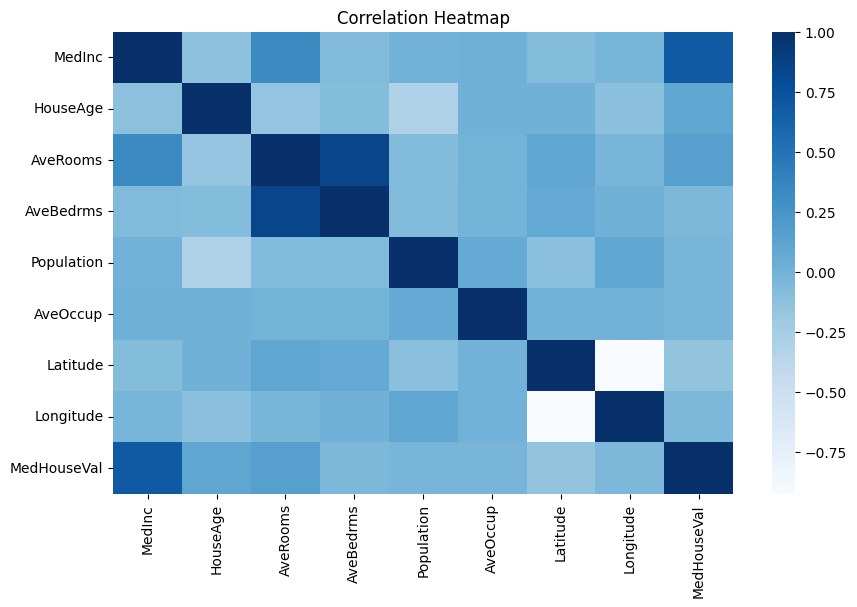

In [7]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


##  Step 3: Split into Training and Testing Sets
We select a couple of features (`MedInc` = Median Income, `AveRooms` = Average Rooms) to predict house prices.  

In [8]:
# Select features (Median Income & Average Rooms)
X = df[['MedInc', 'AveRooms']]
y = df['MedHouseVal']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (16512, 2)
Testing set size: (4128, 2)


## Step 4: Train the Linear Regression Model
We fit a simple **Linear Regression model** on the training data.  

In [9]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 0.5972677793933256
Coefficients: [ 0.43626089 -0.04017161]


## Step 5: Evaluate the Model
We check **R² score** and **Mean Squared Error (MSE)** to measure model performance.  

In [10]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.7021550469058006
R² Score: 0.4641710652437856


## Step 6: Visualization of Results
We visualize the predicted vs. actual house prices and regression line.  


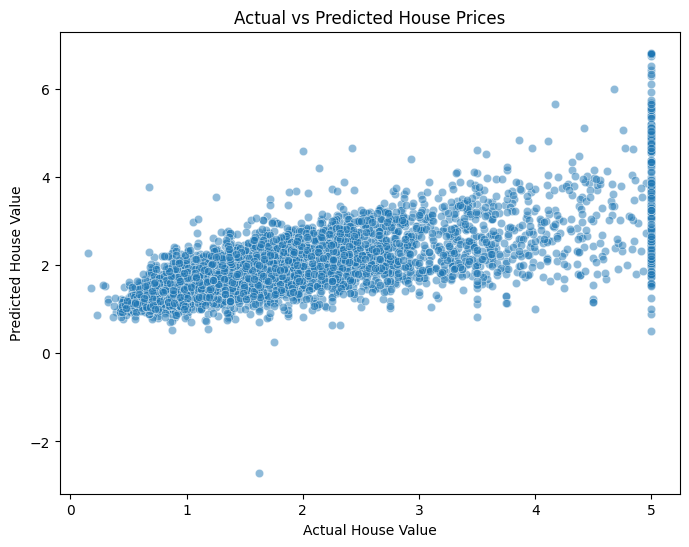

In [11]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Prices")
plt.show()


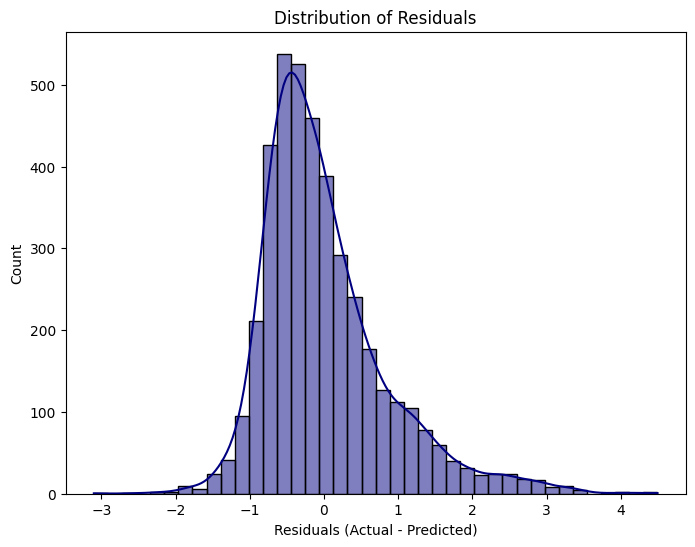

In [12]:
# Residuals distribution
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=40, kde=True, color="navy")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()


## Key Insights
- Median Income (`MedInc`) is the most influential feature for predicting house prices.  
- The model performs **decently** with R² score ~0.47 (not perfect, but good for simple features).  
- More features (like population, latitude, longitude) can improve performance.  
- Residual analysis shows that predictions are fairly balanced around zero.  